# CALIDAD DEL AIRE
## REGRESIÓN, CLASIFICACIÓN Y AGRUPAMIENTO 

**Bibliotecas necesarias**

In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


**Base de datos para el entrenamiento**

In [667]:
df=pd.read_csv('Downloads/ContaminacionAire.csv')#Colocar ruta de la base de datos

**Visualizar los primeros valores de la base de datos para conocer sus filas y columnas**

In [670]:
print(df.head)

<bound method NDFrame.head of       Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2  

**Conocer el tamaño de la base de datos**

In [673]:
print(df.shape)

(5000, 10)


**Conocer el número de filas y columnas, tipo de datos, cantidad de valores nulos y uso de memoria**

In [676]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None


**Conocer el número de valores no nulos por columna, media de los valores, desviación estándar y los mínimos y máximos de los valores**

In [679]:
print(df.describe())

       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%

**Tratamiento de la base datos para adaptala a las necesidades**

*Eliminar columnas no necesarias*

In [682]:
print("Columnas en el archivo CSV:")
print(df.columns)

# Lista de columnas que deseas eliminar
columnas_a_eliminar = ['Proximity_to_Industrial_Areas','Population_Density']  # Reemplaza con los nombres de las columnas que no usarás

# Eliminar las columnas
df = df.drop(columns=columnas_a_eliminar)

# Guardar el resultado en un nuevo archivo CSV 
df.to_csv('archivo_limpio.csv', index=False)
print("Las columnas especificadas han sido eliminadas y el archivo ha sido actualizado.")

Columnas en el archivo CSV:
Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')
Las columnas especificadas han sido eliminadas y el archivo ha sido actualizado.


**Verificar que el tratamiento de datos se hizo correctamente**

In [685]:
print(df.head)

<bound method NDFrame.head of       Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO Air Quality
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72    Moderate
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64    Moderate
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63    Moderate
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15        Good
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01        Good
...           ...       ...    ...    ...   ...   ...   ...         ...
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   Hazardous
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54    Moderate
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63    Moderate
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89        Good
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38    Moderate

[5000 rows x 8 columns]>


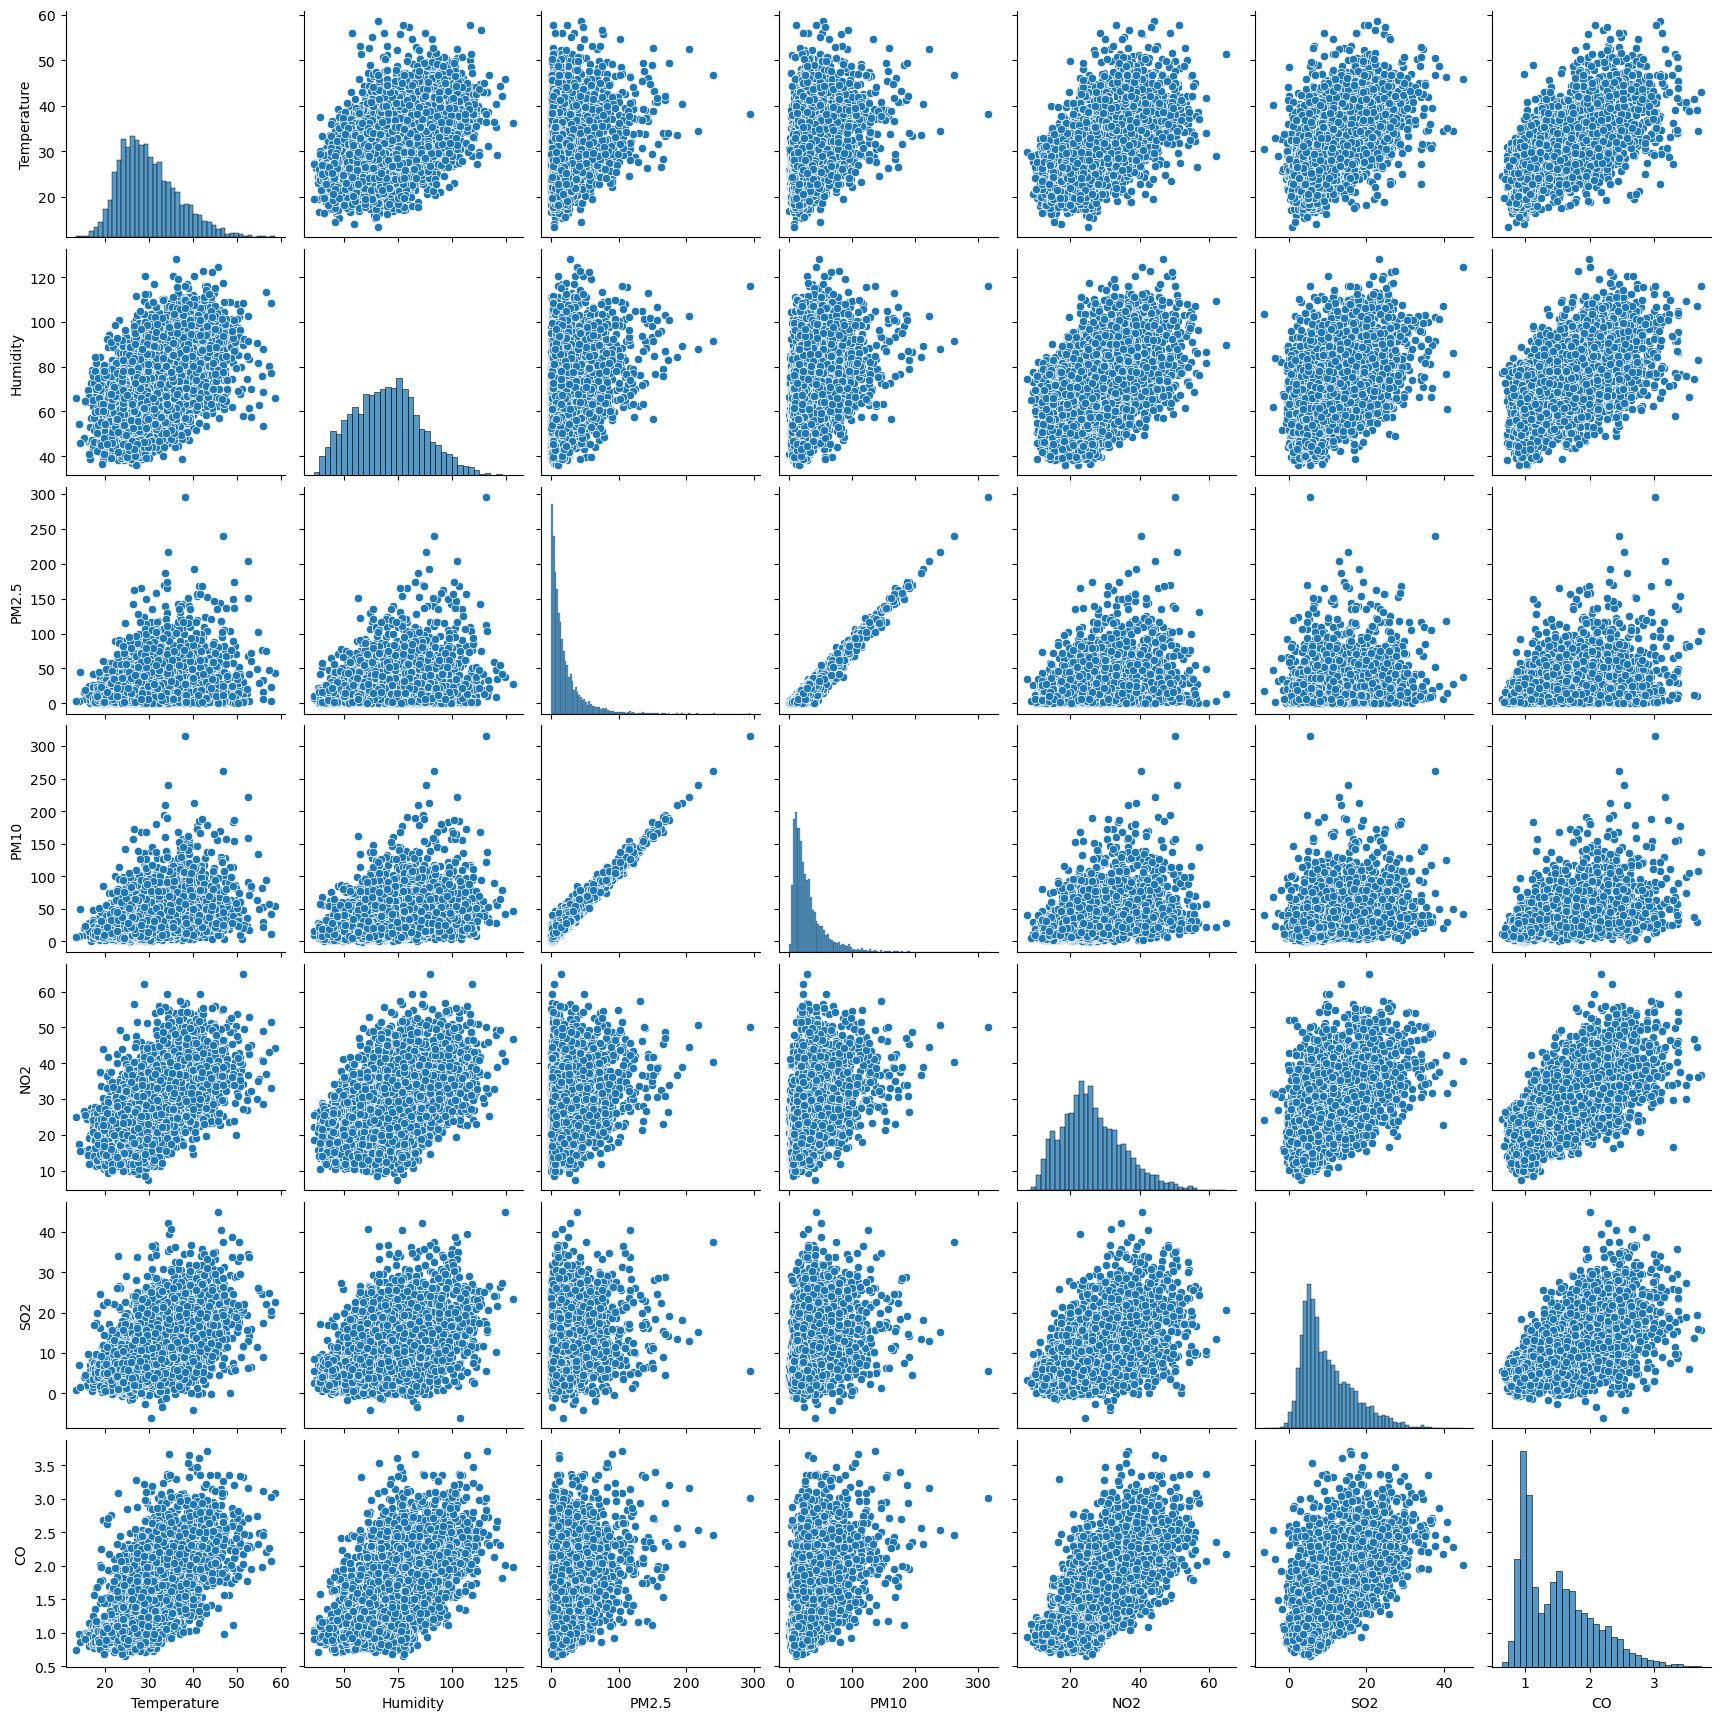

In [435]:
sns.pairplot(df)
plt.show()

**Definir la variable dependiente**

In [687]:
# Definir la variable dependiente (lo que quieres predecir)
y = df['PM2.5']  # Cambia el nombre por tu columna objetivo

# Verificar la variable dependiente
print("Variable dependiente:")
print(y.head())

Variable dependiente:
0     5.2
1     2.3
2    26.7
3     6.1
4     6.9
Name: PM2.5, dtype: float64


**Definir la variable independiente**

In [690]:
# Definir las variables independientes (predictoras)
X = df[['Temperature', 'Humidity', 'PM10', 'NO2','SO2','CO']]  # Cambia por las columnas relevantes

# Verificar las variables independientes
print("Variables independientes:")
print(X.head())

Variables independientes:
   Temperature  Humidity  PM10   NO2   SO2    CO
0         29.8      59.1  17.9  18.9   9.2  1.72
1         28.3      75.6  12.2  30.8   9.7  1.64
2         23.1      74.7  33.8  24.4  12.6  1.63
3         27.1      39.1   6.3  13.5   5.3  1.15
4         26.5      70.7  16.0  21.9   5.6  1.01


**Escalar los datos con el fin de transformar las variables independientes para que tengan la misma escala**

In [693]:
# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Dividir los datos en conjuntos de entrenamiento y de prueba**

*Sirve para garantizar que el modelo puede generalizar bien a datos no vistos, evaluando su desempeño en un conjunto de datos separados*

In [696]:
# Dividir los datos (80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificar dimensiones
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

Conjunto de entrenamiento: (4000, 6), (4000,)
Conjunto de prueba: (1000, 6), (1000,)


**Visualización de la relación entre las variables independientes y la dependiente**

*Ayuda a detectar tendencias lineales o no lineales*

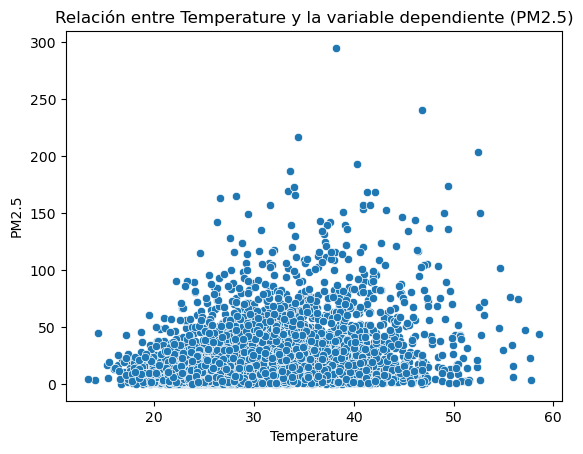

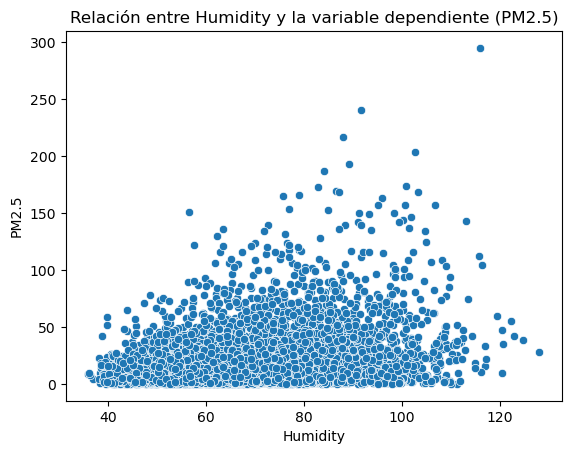

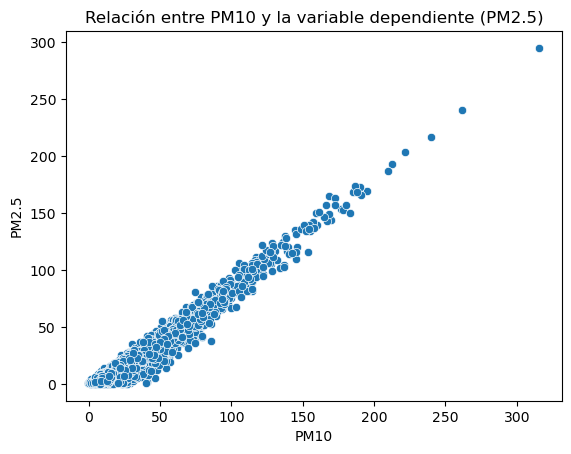

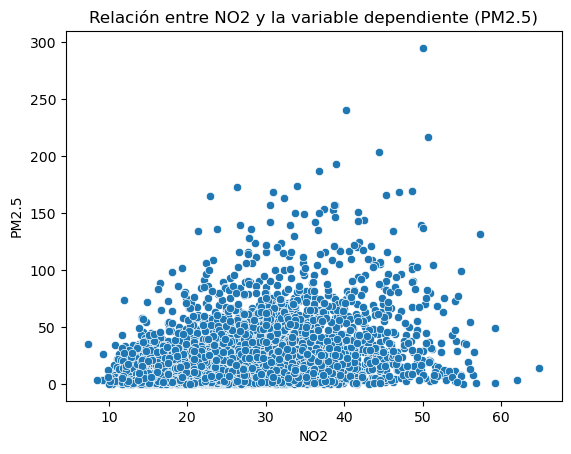

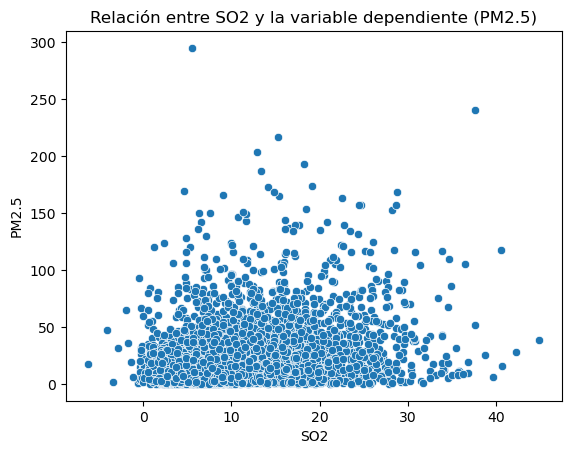

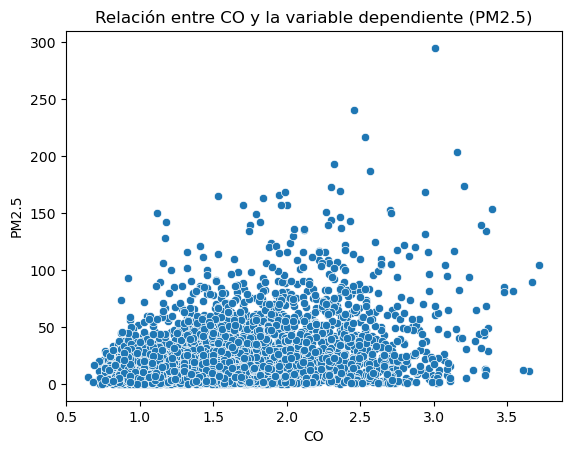

In [699]:
# Graficar dispersión para cada variable independiente importante
for columna in X.columns:
    sns.scatterplot(x=X[columna], y=y)
    plt.title(f'Relación entre {columna} y la variable dependiente (PM2.5)')
    plt.show()

**Calcular el VIF (Variance Inflation Factor) para detectar multicolinealidad entre las variables independientes**

*La la multicolinealidad ocurre cuando dos o más variables independientes estaán altamente correlacionadas entre sí*

Interpretación:
- VIF = 1 : No hay correlación entre la variable y las demás
- 1 < VF < 5: Hay correlación es moderada y generalmente aceptable
- VIF > 5: Existe alta correlación (multicolinealidad severa)
- VIF > 10: Multicolinealidad extrema

In [702]:
# Calcular VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

      Variable        VIF
0  Temperature  29.341705
1     Humidity  22.436404
2         PM10   3.036695
3          NO2  21.320026
4          SO2   5.894436
5           CO  27.936957


## Regresión
**Al ver que hay mucha multicolinealidad se decidió escoger la regresión Ridge ya quees eficaz si las variables independientes están correlacionadas**

In [707]:
# Definir el rango de valores de alpha para reegresión Ridge
parametros = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Configurar GridSearchCV para buscar el mejor alpha
modelo_ridge = Ridge()  # Modelo base
grid_search = GridSearchCV(modelo_ridge, parametros, cv=5, scoring='neg_mean_squared_error')  # 5 pliegues
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha y entrenar el modelo
mejor_alpha = grid_search.best_params_['alpha']
print("Mejor valor de alpha:", mejor_alpha)

Mejor valor de alpha: 0.1


**Modelo de Ridge**

Ridge MSE: 20.99045880146898, R²: 0.9585285402332842


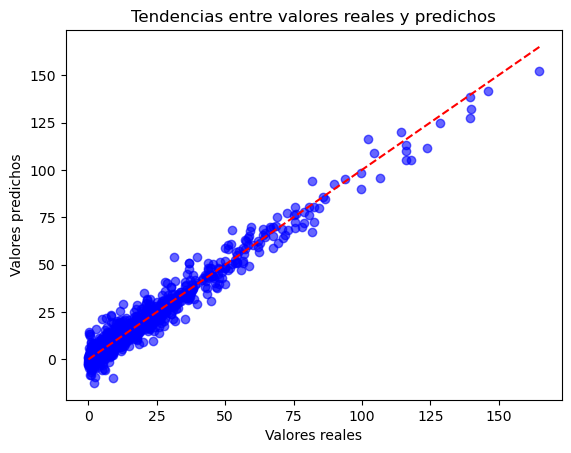

In [710]:
# Aplicar regresión Ridge
modelo_ridge = Ridge(alpha=0.1)  # Ajusta alpha para controlar la penalización
modelo_ridge.fit(X_train, y_train)

# Predicción
predicciones_ridge = modelo_ridge.predict(X_test)

# Evaluación del modelo
mse_ridge = mean_squared_error(y_test, predicciones_ridge)
r2_ridge = r2_score(y_test, predicciones_ridge)
print(f"Ridge MSE: {mse_ridge}, R²: {r2_ridge}")

# Identificar tendencias visualmente
plt.scatter(y_test, y_pred_optimizado, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Tendencias entre valores reales y predichos')
plt.show()

**Tratamiento de los nuevos datos para la predicción**

In [565]:
#Predicción de nuevos datos
datos_nuevos = pd.read_csv("Downloads/archive/AirQualityData.csv" ) # Cambia por la ruta a tu archivo .csv
print("Columnas en el archivo CSV:")
print(datos_nuevos.columns)

# Lista de columnas que deseas eliminar
columnas_a_eliminar = ['PM2.5','Date', 'Time','NOx(GT)','O3(GT)','Pressure','WindSpeed','WindDirection','CO_NOx_Ratio', 'NOx_NO2_Ratio', 'Temp_Humidity_Index',
       'AirQualityIndex','CO_MA3', 'NO2_MA3','O3_MA3', 'DayOfWeek', 'Hour']  # Reemplaza con los nombres de las columnas que no usarás

# Eliminar las columnas
datos_nuevos = datos_nuevos.drop(columns=columnas_a_eliminar)

# Cambiar el orden de las columnas
# Especifica el nuevo orden de las columnas
nuevo_orden = ['Temperature', 'Humidity','PM10','NO2(GT)','SO2(GT)','CO(GT)']  # Cambia por el orden que desees
datos_nuevos = datos_nuevos[nuevo_orden]
print(datos_nuevos.head)

# Paso 2: Cambiar los nombres de las columnas
# Especifica los nuevos nombres para las columnas
nuevos_nombres = {'NO2(GT)': 'NO2','SO2(GT)': 'SO2','CO(GT)': 'CO'}
datos_nuevos = datos_nuevos.rename(columns=nuevos_nombres)

# Guardar el archivo CSV actualizado (opcional)
datos_nuevos.to_csv('archivo_limpio_dn.csv', index=False)
print(datos_nuevos.head)

Columnas en el archivo CSV:
Index(['Date', 'Time', 'CO(GT)', 'NOx(GT)', 'NO2(GT)', 'O3(GT)', 'SO2(GT)',
       'PM2.5', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'WindSpeed',
       'WindDirection', 'CO_NOx_Ratio', 'NOx_NO2_Ratio', 'Temp_Humidity_Index',
       'AirQualityIndex', 'CO_MA3', 'NO2_MA3', 'O3_MA3', 'DayOfWeek', 'Hour'],
      dtype='object')
<bound method NDFrame.head of       Temperature   Humidity        PM10     NO2(GT)    SO2(GT)    CO(GT)
0       28.564580  12.399195  208.803124  144.333317   1.215679  3.807947
1        6.793192  10.716451  145.595579  137.769318   1.016178  9.512072
2       24.436552  30.193792   26.155000   20.055086  24.140910  7.346740
3       26.463951  81.938885  276.367944  184.591909   2.435392  6.026719
4       10.530331  91.427289  294.295449  114.125968  48.752095  1.644585
...           ...        ...         ...         ...        ...       ...
3995    20.114346  31.635106   72.636576    1.924252  43.974893  4.476860
3996    32.767753

**Generar las predicciones y guardarlas en un archivo csv**

In [570]:
# Generar predicciones con el modelo optimizado
predicciones_nuevas = modelo_ridge_optimizado.predict(datos_nuevos)

# Mostrar las predicciones
print("Predicciones para los datos del archivo CSV:")
print(predicciones_nuevas)

# Guardar las predicciones en un archivo CSV
predicciones_df = pd.DataFrame({'Predicciones': predicciones_nuevas})
predicciones_df.to_csv('predicciones_ridge.csv', index=False)

print("\nLas predicciones han sido guardadas en 'predicciones_ridge.csv'.")

# Predicciones con el modelo optimizado
predicciones = modelo_ridge_optimizado.predict(datos_nuevos)
print("Predicciones para los datos del archivo CSV:", predicciones)

predicciones_df = pd.DataFrame({'Predicciones': predicciones_nuevas})
predicciones_df.to_csv('predicciones_ridge.csv', index=False)

print("\nLas predicciones han sido guardadas en 'predicciones_ridge.csv'.")


Predicciones para los datos del archivo CSV:
[5308.02205799 3666.84815778  626.98206937 ... 2297.6289593   337.62668624
 1015.02613797]

Las predicciones han sido guardadas en 'predicciones_ridge.csv'.
Predicciones para los datos del archivo CSV: [5308.02205799 3666.84815778  626.98206937 ... 2297.6289593   337.62668624
 1015.02613797]

Las predicciones han sido guardadas en 'predicciones_ridge.csv'.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


**Visualización de los valores reales y las predicciones del modelo**

Error Cuadrático Medio (MSE): 20.99045880146898
Error Absoluto Medio (MAE): 3.305746195107973
Coeficiente R²: 0.9585285402332842


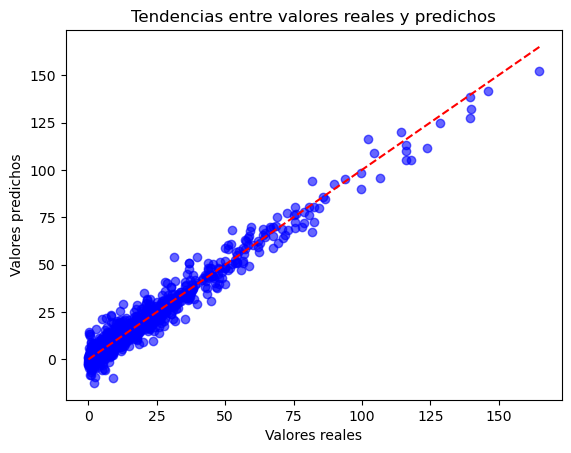

In [468]:
mse = mean_squared_error(y_test, y_pred_optimizado)
mae = mean_absolute_error(y_test, y_pred_optimizado)
r2 = r2_score(y_test, y_pred_optimizado)

print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente R²:", r2)

plt.scatter(y_test, y_pred_optimizado, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Tendencias entre valores reales y predichos')
plt.show()

## Clasificación

**Elección de la variable dependiente e independiente**

In [470]:
X_clas = df[['Temperature','Humidity','PM2.5', 'PM10', 'NO2','SO2','CO']]
y_clas = df['Air Quality']

**Revisar los valores unicos de la variable dependiente**

In [472]:
print(df.columns)
print("Valores únicos en 'Air Quality':", df['Air Quality'].unique())

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Air Quality'],
      dtype='object')
Valores únicos en 'Air Quality': ['Moderate' 'Good' 'Hazardous' 'Poor']


**Etiquetar los valores categóricos por numéricos en la variable dependiente**

In [588]:
label_encoder = LabelEncoder()
y_clas = label_encoder.fit_transform(df['Air Quality'])

# Verificar la codificación
print("Clases codificadas:", label_encoder.classes_)  # Mapeo original
print("y_clas después de codificar:", y_clas[:10])    # Primeros valores codificados

Clases codificadas: [0 1 2 3]
y_clas después de codificar: [2 2 2 0 0 1 3 2 3 3]


**Dividir los datos en conjuntos de entrenamiento y de prueba**

*Sirve para garantizar que el modelo puede generalizar bien a datos no vistos, evaluando su desempeño en un conjunto de datos separados*

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=0.2, random_state=42)

**Creación del modelo de clasificación Gradient Boosting**

In [596]:
# Crear el modelo de Gradient Boosting
modelo_xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Entrenar el modelo
modelo_xgb.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
y_pred_xgb = modelo_xgb.predict(X_test)
print(f"Precisión: {accuracy_score(y_test, y_pred_xgb)}")

print("Valores únicos en y:", np.unique(y_clas))
print("Cantidad de clases:", len(np.unique(y_clas)))

Precisión: 0.918
Valores únicos en y: [0 1 2 3]
Cantidad de clases: 4


**Visualización de la importancia de las características**

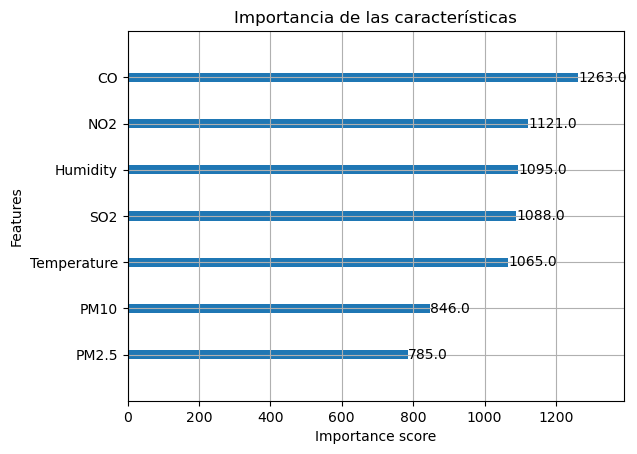

In [486]:
# Graficar la importancia de las características
plot_importance(modelo_xgb)
plt.title("Importancia de las características")
plt.show()

**Tratamiento de la base de datos que se usará como entrada para la predicción de datos**

In [712]:
#Predicción de nuevos datos
datos_nuevos_clas = pd.read_csv("Downloads/archive/AirQualityData.csv" ) # Cambia por la ruta a tu archivo .csv
print("Columnas en el archivo CSV:")
print(datos_nuevos.columns)

# Paso 1: Cambiar el orden de las columnas
# Especifica el nuevo orden de las columnas
nuevo_orden = ['Temperature', 'Humidity','PM2.5','PM10','NO2(GT)','SO2(GT)','CO(GT)']  # Cambia por el orden que desees
datos_nuevos_clas = datos_nuevos_clas[nuevo_orden]

# Paso 2: Cambiar los nombres de las columnas
# Especifica los nuevos nombres para las columnas
nuevos_nombres = {'NO2(GT)': 'NO2','SO2(GT)': 'SO2','CO(GT)': 'CO'}
datos_nuevos_clas = datos_nuevos_clas.rename(columns=nuevos_nombres)

# Guardar el archivo CSV actualizado (opcional)
datos_nuevos_clas.to_csv('archivo_limpio_dn.csv', index=False)
print(datos_nuevos_clas.head)

Columnas en el archivo CSV:
Index(['Temperature', 'Humidity', 'PM10', 'NO2', 'SO2', 'CO'], dtype='object')
<bound method NDFrame.head of       Temperature   Humidity       PM2.5        PM10         NO2        SO2  \
0       28.564580  12.399195  147.349671  208.803124  144.333317   1.215679   
1        6.793192  10.716451   40.979839  145.595579  137.769318   1.016178   
2       24.436552  30.193792   72.594740   26.155000   20.055086  24.140910   
3       26.463951  81.938885  134.339724  276.367944  184.591909   2.435392   
4       10.530331  91.427289   99.007422  294.295449  114.125968  48.752095   
...           ...        ...         ...         ...         ...        ...   
3995    20.114346  31.635106  183.094419   72.636576    1.924252  43.974893   
3996    32.767753  13.068672   88.552254  244.969444  174.860062   3.293884   
3997    29.330901  75.405576   78.683868   92.032781   62.157711  15.881225   
3998     0.339514  31.012856   50.107361   20.002019  187.779183  22.7226

**Modelo de predcción**

*El modelo predecirá la calidad del aire de los nuevos valores de datos y los guardará en un archivo .csv*

In [500]:
#Predicciones
predicciones = modelo_xgb.predict(datos_nuevos_clas)
print(f"Clase predicha: {predicciones}")
predicciones_df = pd.DataFrame({'Predicciones': predicciones})
predicciones_df.to_csv('predicciones_nuevas.csv', index=False)

print("Predicciones guardadas en 'predicciones_nuevas.csv'")


Clase predicha: [1 1 3 ... 1 1 2]
Predicciones guardadas en 'predicciones_nuevas.csv'


**Cambio de los valores predichos para que el valor numérico asignado como etiqueta previamente, se muestre nuevamente como valor categórico**

*La predicción se guarda en un archivo csv*

In [502]:
#Mapeo de las clases originales
mapeo_clases = {0: 'Good', 1: 'Hazardous', 2: 'Moderate', 3: 'Poor'}

# Convertir las predicciones numéricas a sus categorías originales
predicciones_categoricas = [mapeo_clases[pred] for pred in predicciones]
print("Clases categóricas predichas:", predicciones_categoricas)

# Crear un DataFrame con las predicciones categóricas
predicciones_df = pd.DataFrame({'Predicciones': predicciones_categoricas})

# Guardar las predicciones en un archivo CSV
predicciones_df.to_csv('predicciones_categoricas.csv', index=False)
print("Predicciones categóricas guardadas en 'predicciones_categoricas.csv'")

# Crear un DataFrame con las predicciones categóricas
predicciones_df = pd.DataFrame({'Predicciones': predicciones_categoricas})

# Guardar las predicciones en un archivo CSV
predicciones_df.to_csv('predicciones_categoricas.csv', index=False)
print("Predicciones categóricas guardadas en 'predicciones_categoricas.csv'")

Clases categóricas predichas: ['Hazardous', 'Hazardous', 'Poor', 'Hazardous', 'Hazardous', 'Moderate', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Good', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Poor', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Good', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Poor', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Good', 'Hazardous', 'Hazardous', 'Hazardous', 'Poor', 'Hazardous', 'Hazardous', 'Hazardous', 'Hazardous', 'Goo

**Generar el entrenamiento con el modelo de clasificación de Random Forest para una comparación**

Precisión de Random Forest: 0.923
  Características  Importancia_XGBoost  Importancia_RandomForest
0     Temperature             0.057617                  0.118696
1        Humidity             0.043131                  0.066536
2           PM2.5             0.024494                  0.029868
3            PM10             0.030694                  0.055531
4             NO2             0.094238                  0.152308
5             SO2             0.069056                  0.153446
6              CO             0.680769                  0.423615


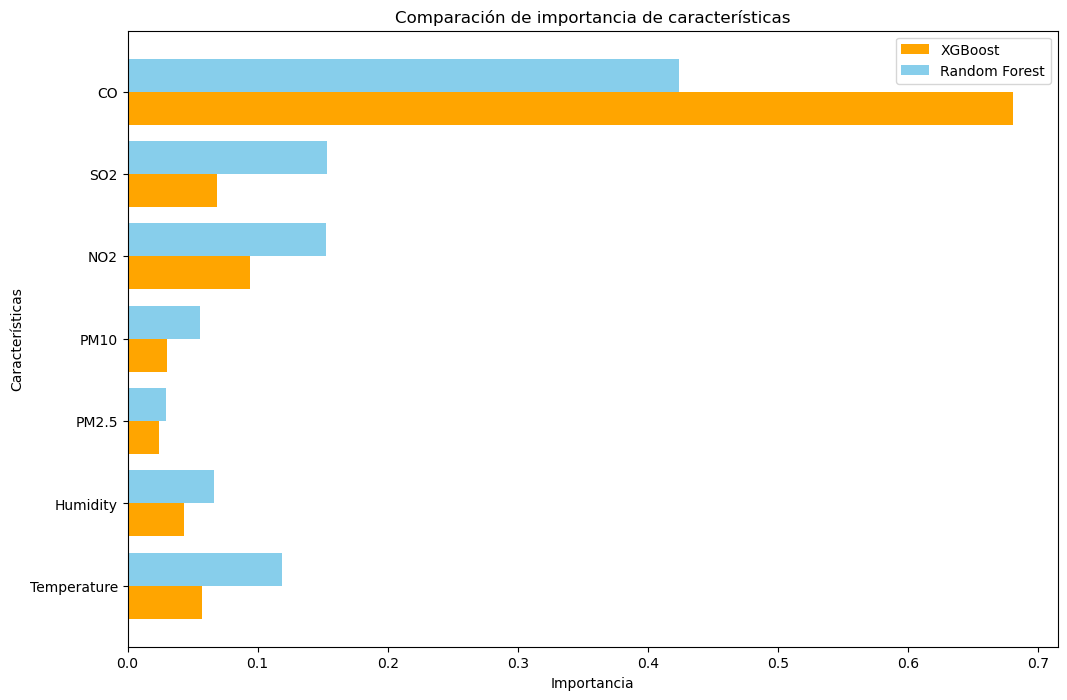

In [610]:
# modelo_xgb ya está entrenado y listo

# Entrenar un modelo de Random Forest (nueva implementación)
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=100)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
print("Precisión de Random Forest:", accuracy_score(y_test, y_pred_rf))

# Extraer importancia de las características de ambos modelos
importancia_rf = modelo_rf.feature_importances_
importancia_xgb = modelo_xgb.feature_importances_  # Extraído del modelo de XGBoost ya entrenado

# Crear una tabla comparativa
comparacion = pd.DataFrame({
    'Características': X_clas.columns,
    'Importancia_XGBoost': importancia_xgb,
    'Importancia_RandomForest': importancia_rf
})
print(comparacion)

# Visualización comparativa de la importancia de las características
plt.figure(figsize=(12, 8))
indices = np.arange(len(X_clas.columns))
width = 0.4

plt.barh(indices - width/2, importancia_xgb, height=width, label='XGBoost', color='orange')
plt.barh(indices + width/2, importancia_rf, height=width, label='Random Forest', color='skyblue')
plt.yticks(indices, X_clas.columns)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Comparación de importancia de características')
plt.legend()
plt.show()

**Comparación desempeño entre XGBoost y Random Forest**

In [613]:
# Métricas para XGBoost
print("Métricas para XGBoost:")
print("Precisión de XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("Reporte de clasificación de XGBoost:\n", classification_report(y_test, y_pred_xgb))
print("Matriz de confusión de XGBoost:\n", confusion_matrix(y_test, y_pred_xgb))

# Métricas para Random Forest
print("\nMétricas para Random Forest:")
print("Precisión de Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Reporte de clasificación de Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Matriz de confusión de Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

# Comparación final
print("\nComparación de precisión entre modelos:")
print(f"XGBoost: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")

Métricas para XGBoost:
Precisión de XGBoost: 0.918
Reporte de clasificación de XGBoost:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       409
           1       0.83      0.80      0.82       111
           2       0.93      0.93      0.93       294
           3       0.79      0.81      0.80       186

    accuracy                           0.92      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.92      0.92      0.92      1000

Matriz de confusión de XGBoost:
 [[406   0   3   0]
 [  0  89   0  22]
 [  5   0 272  17]
 [  0  18  17 151]]

Métricas para Random Forest:
Precisión de Random Forest: 0.923
Reporte de clasificación de Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       409
           1       0.85      0.79      0.82       111
           2       0.93      0.94      0.93       294
           3       0.81      0.82      0.

## Agrupamiento

**Seleccionar características (todas deben ser numéricas después de la transformación)**

In [630]:
X_cluster = df  # Todas las columnas del DataFrame ya son numéricas

**Escalar los datos con el fin de transformar las variables independientes para que tengan la misma escala**

In [633]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

**Visualizar los datos en 2D usando PCA**

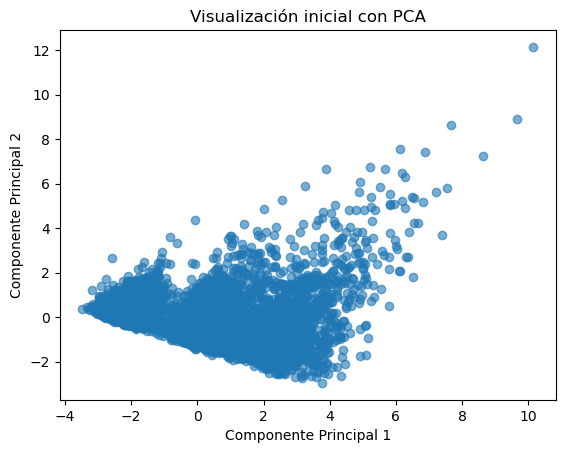

In [636]:
pca = PCA(n_components=2)
X_reducido = pca.fit_transform(X_scaled)

plt.scatter(X_reducido[:, 0], X_reducido[:, 1], alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización inicial con PCA')
plt.show()

**Método del codo para determinar el número de clusters en K-Means**

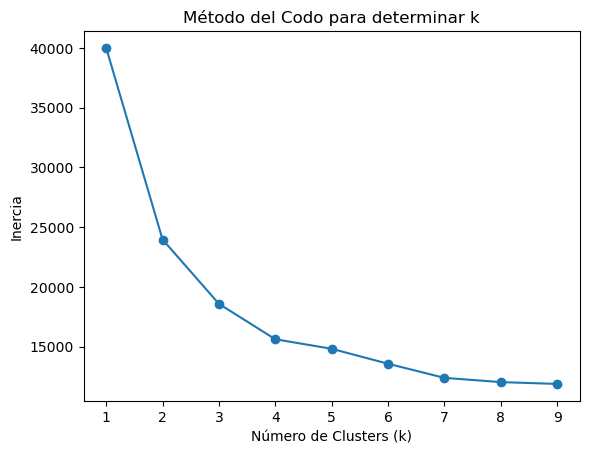

In [639]:
distorsiones = []
K = range(1, 10)  # Probar entre 1 y 10 clusters
for k in K:
    kmeans_temp = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    distorsiones.append(kmeans_temp.inertia_)

plt.plot(K, distorsiones, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k')
plt.show()

**Aplicar K-Means con el número óptimo de clusters (ajusta k según el método del codo)**

In [642]:
k = 2  # Cambia este valor con base en el gráfico del codo
modelo_kmeans = KMeans(n_clusters=k, random_state=42)
modelo_kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

**Visualizar los clusters generados por K-Means en espacio PCA**

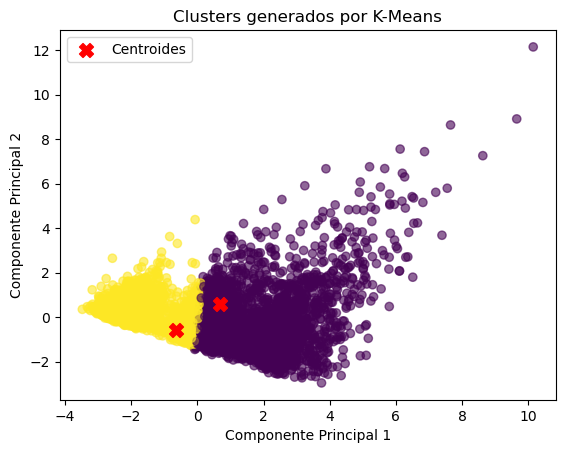

In [645]:
plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=modelo_kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], 
            color='red', marker='X', s=100, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters generados por K-Means')
plt.legend()
plt.show()

**Evaluar la calidad de los clusters con Silhouette Score**

In [648]:
silhouette_kmeans = silhouette_score(X_scaled, modelo_kmeans.labels_)
print(f"Silhouette Score para K-Means: {silhouette_kmeans}")

Silhouette Score para K-Means: 0.357683674723238


**Probar el modelo de DBSCAN para comparación**

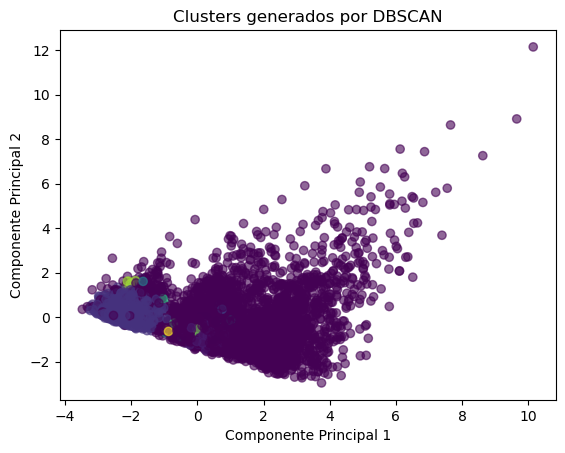

In [651]:
# Aplicar DBSCAN para clusters con densidades variables
modelo_dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples según tu dataset
labels_dbscan = modelo_dbscan.fit_predict(X_scaled)

# Visualizar clusters generados por DBSCAN en espacio PCA
plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=labels_dbscan, cmap='viridis', alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters generados por DBSCAN')
plt.show()

**Evaluar la calidad de los clusters generados por DBSCAN (si hay más de un cluster)**

In [656]:
if len(set(labels_dbscan)) > 1:  # Verifica que haya más de 1 cluster generado
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
    print(f"Silhouette Score para DBSCAN: {silhouette_dbscan}")
else:
    print("DBSCAN no generó suficientes clusters para calcular el Silhouette Score.")

# Interpretar y decidir
print("Resultados:")
print(f"Silhouette Score de K-Means: {silhouette_kmeans}")
if len(set(labels_dbscan)) > 1:
    print(f"Silhouette Score de DBSCAN: {silhouette_dbscan}")
else:
    print("DBSCAN detectó ruido o clusters insuficientes.")

Silhouette Score para DBSCAN: -0.2385121372822191
Resultados:
Silhouette Score de K-Means: 0.357683674723238
Silhouette Score de DBSCAN: -0.2385121372822191
